# Asset pricing

## Kyle Model - homework

Prof. Scott Condie

Author: Martina Fraschini

### Load data

In [1]:
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import statsmodels.api as sm

# Load data
with open('AAPL', 'rb') as file_pickle:
    AAPL = pickle.load(file_pickle)
with open('C', 'rb') as file_pickle:
    C = pickle.load(file_pickle)
with open('GBX', 'rb') as file_pickle:
    GBX = pickle.load(file_pickle)
with open('SPY', 'rb') as file_pickle:
    SPY = pickle.load(file_pickle)
with open('THO', 'rb') as file_pickle:
    THO = pickle.load(file_pickle)


In [2]:
print(AAPL[320][1][1])

(1122, 'B', 43128.198123400005, 104210481.0)


### Exercise 1

In [3]:
class SingleOrderbook:
    
    def __init__(self, data, time):
        self.list = data[time]
        self.time = self.list[0]
        df = pd.DataFrame.from_dict(self.list[1], orient='index')
        df.columns = ["Quantity", "Order", "var1","var2"]
        df = df.drop(["var1","var2"], axis = 1)
        
        self.demand = df[df["Order"] == 'B'].sort_index(ascending=False)
        self.supply = df[df["Order"] == 'S'].sort_index()
        self.demand["CumulativeB"] = -self.demand['Quantity'].cumsum()
        self.supply["CumulativeS"] = self.supply['Quantity'].cumsum()
        
        # define prices and quantities
        self.order = self.demand.merge(self.supply,  how='outer', left_index=True, right_index=True)
        self.order = self.order.drop(["Quantity_x","Order_x", "Quantity_y","Order_y"], axis = 1)
        self.order = self.order.fillna(0)
        self.order["Cumulative"] = self.order["CumulativeB"] + self.order["CumulativeS"]
        self.P0 = self.order["Cumulative"][self.order["Cumulative"] > 0].index.values[0]
        myQ = self.order["Cumulative"]
        self.Q = myQ[(myQ.index < 1.7*self.P0) & (myQ.index > .3*self.P0)]
        self.P = self.Q.index.values

    def estimate(self):
        X = self.P
        X = sm.add_constant(X)
        model = sm.OLS(X, self.Q)
        res = model.fit()
        self.gamma = res.params[0].values
        self.beta = res.params[1].values
        
    def plot_ob(self):
        fig = plt.figure(figsize=(10,7))
        plt.plot(self.P, self.Q)
        plt.plot(self.P, self.gamma + self.beta*self.P)
        plt.xlim(self.P0*0.3, self.P0*1.7)
        plt.xlabel("Price")
        plt.ylabel("Quantity")
        plt.show()



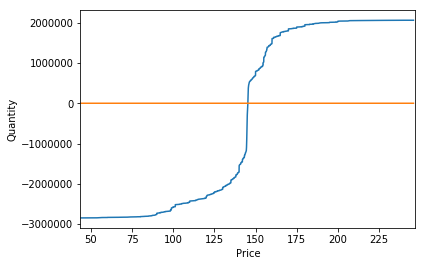

In [4]:
Apple = SingleOrderbook(AAPL, 100)
Apple.estimate()
plt.plot(Apple.P, Apple.Q)
plt.plot(Apple.P, Apple.gamma + Apple.beta*Apple.P)
plt.xlim(Apple.P0*0.3, Apple.P0*1.7)
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()